https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download

#### 1. Загружаем датасет

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Cancer_Data.csv')
df = df.iloc[:, 1:]
df = df.replace({'diagnosis': {'M': 0, 'B': 1}})

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [3]:
df.isna().sum().sum()

0

In [4]:
vMin = df.min(axis=0)
x = (df - vMin) / (df.max(axis=0) - vMin)
x

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.0,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


#### 2. Выполнить подбор параметров модели классификатора и регрессора (по выбору) с использованием GridSearchCV:

In [5]:
# 1. Выбрать какую-нибудь модель классификатора (KNeighborsClassifier, DecisionTreeClassifier, Наивный Байес, LogisticRegression...):
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X =  np.array(x.iloc[:, 1:])
Y =  np.array(x.iloc[:, 0])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

dtc = DecisionTreeClassifier()

# 1.1. Выбрать совокупность настраиваемых параметров и диапазоны их значений
params = {'max_depth': range (2, 20, 1),
          'min_samples_leaf': range (1, 10),
          'min_samples_split': range (2,10,2)}
# 1.2. Реализовать поиск наилучших параметров с использованием GridSearchCV
grid = GridSearchCV(dtc, params, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)
# 1.3. Вывести наилучшие найденные значения параметров и соответствующую метрику качества классификации
print(f"Наилучшие значения параметров: {grid.best_params_}")
print(f"Наилучшее значение метрики: {grid.best_score_}")

Наилучшие значения параметров: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 6}
Наилучшее значение метрики: 0.9291182501708818


In [6]:
# 2. Выбрать какую-нибудь модель регрессора (KNeighborsRegressor, DecisionTreeRegressor, LinearReegresion, ...):
from sklearn.tree import DecisionTreeRegressor

X =  np.array(x.iloc[:, 1:])
Y =  np.array(x.iloc[:, 0])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

dtr = DecisionTreeRegressor()

# 2.1. Выбрать совокупность настраиваемых параметров и диапазоны их значений
params = {'max_depth': range (2, 20, 1),
          'min_samples_leaf': range (1, 10),
          'min_samples_split': range (2, 10, 2)}
# 2.2. Реализовать поиск наилучших параметров с использованием GridSearchCV
grid = GridSearchCV(dtr, params, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)
# 2.3. Вывести наилучшие найденные значения параметров и соответствующую метрику качества модели
print(f"Наилучшие значения параметров: {grid.best_params_}")
print(f"Наилучшее значение метрики: {grid.best_score_}")

Наилучшие значения параметров: {'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 2}
Наилучшее значение метрики: 0.7914998985691728


#### 3. Решить задачу классификации с использованием случайного леса (RandomForestClassifier):

In [7]:
# 1. С помощью GridSearchCV подобрать наилучшие параметры случайного леса для задачи классификации 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.33)

forest = RandomForestClassifier(n_estimators = 5)
forest.fit(X_train, y_train)

print('Точность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Точность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Точность на обучающем наборе: 1.000
Точность на тестовом наборе: 0.924


In [8]:
params = {'n_estimators': range(3, 20),
          'max_depth': range (2, 20, 1),
          'min_samples_leaf': range (1, 10),
          'min_samples_split': range (2, 10, 2)}

gridRf = GridSearchCV(forest, params, cv = 5, n_jobs = -1)
gridRf.fit(X_train, y_train)

print(f"Наилучшие значения параметров: {gridRf.best_params_}")
print(f"Наилучшее значение метрики: {gridRf.best_score_}")

Наилучшие значения параметров: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 7}
Наилучшее значение метрики: 0.9891891891891891


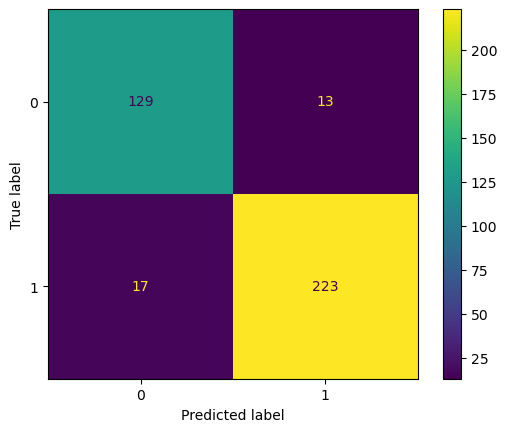

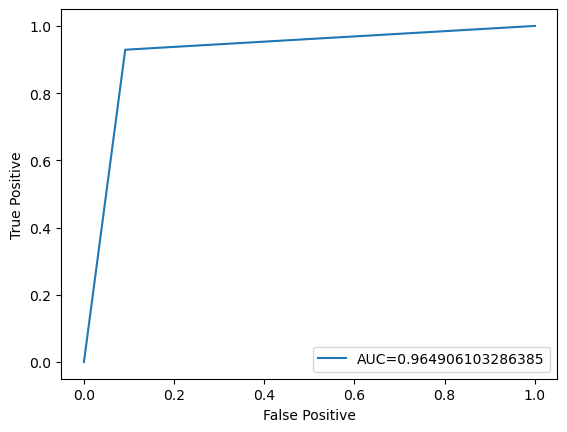

In [9]:
# 2. С полученными параметрами вычислить метрики качества классификации (Confusion Matrix, ROC + AUC)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_test_predict = gridRf.predict(X_test)
y_test_prob = gridRf.predict_proba(X_test)[:, 1]

confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

auc = roc_auc_score(y_test, y_test_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
plt.plot(fpr, tpr, label = "AUC=" + str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()
plt.show()

#### 4. Реализовать ансамбли моделей для задачи классификации и регрессии

In [10]:
#1. Реализовать бэггинг BaggingClassifier на базе любой модели классификации
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# разделяем данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

# создаем базовый алгоритм KNeighborsClassifier
base_model = KNeighborsClassifier()

# создаем ансамбль на основе базового алгоритма с использованием бэггинга
bagging_model = BaggingClassifier(estimator = base_model, n_estimators = 10, random_state = 42)

# обучаем модель на обучающих данных
bagging_model.fit(X_train, y_train)

# делаем предсказания на тестовых данных
y_pred = bagging_model.predict(X_test)

In [11]:
# вычисляем и выводим метрики качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

Accuracy: 0.9680851063829787
Precision: 0.9754098360655737
Recall: 0.9754098360655737
F1 Score: 0.9754098360655737


In [12]:
# 2. Реализовать бэггинг для задачи регрессии BaggingRegressor для любой модели регрессии
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

# разделяем данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

bagging_model = BaggingRegressor(estimator=base_model, n_estimators=5)

# обучаем модель на обучающих данных
bagging_model.fit(X_train, y_train)

# делаем предсказания на тестовых данных
y_pred = bagging_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# вычисляем и выводим метрики качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}\nMAE: {mae}\nR^2: {r2}')

MSE: 0.03702127659574469
MAE: 0.06382978723404255
R^2: 0.8385987418280498


In [14]:
#3. Реализовать метод градиентного бустинга GradiendBoostingClassifier на базе любой модели классификации 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# разделяем данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

# создаем базовый алгоритм DecisionTreeClassifier
base_model = DecisionTreeClassifier()

boosting_model = GradientBoostingClassifier(n_estimators = 10, random_state = 42)

# обучаем модель на обучающих данных
boosting_model.fit(X_train, y_train)

# делаем предсказания на тестовых данных
y_pred = boosting_model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# вычисляем и выводим метрики качества модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall},\nF1 Score: {f1}')

Accuracy: 0.925531914893617,
Precision: 0.9130434782608695,
Recall: 0.963302752293578,
F1 Score: 0.9375


In [16]:
#4. Реализовать метод градиентного бустинга GradiendBoostingRegressor на базе любой модели регрессии 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# разделяем данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# обучаем модель на обучающих данных
boosting_model.fit(X_train, y_train)

# делаем предсказания на тестовых данных
y_pred = boosting_model.predict(X_test)

In [17]:
# вычисляем и выводим метрики качества модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}\nMAE: {mae}\nR^2: {r2}')

MSE: 0.06355510137203585
MAE: 0.10762423337704749
R^2: 0.7190379608638855
